# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    city_url = url + "&q=" + city.replace(" ","+")
    
    time.sleep(1)
    
    try:
        city_weather = requests.get(city_url).json()
        #print(city_url)- don't keep print statement so as to not compromise the api key later.
    
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]

        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(city_data)
df

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Novichikha,52.2040,81.3877,8.44,overcast clouds,85,100,15.86,RU
1,Banjar,-8.1900,114.9675,77.99,broken clouds,89,78,0.94,ID
2,Paita,-5.0892,-81.1144,75.61,few clouds,66,11,4.18,PE
3,Ribeira Grande,38.5167,-28.7000,64.80,scattered clouds,77,40,20.71,PT
4,Rikitea,-23.1203,-134.9692,79.00,light rain,78,9,16.84,PF
...,...,...,...,...,...,...,...,...,...
570,Mahajanga,-15.7167,46.3167,78.82,thunderstorm with light rain,94,75,19.57,MG
571,Boda,4.3189,17.4695,97.99,overcast clouds,11,89,8.23,CF
572,La Paz,-16.5000,-68.1500,57.18,broken clouds,43,75,9.22,BO
573,Lhokseumawe,5.1801,97.1507,76.59,overcast clouds,86,100,4.29,ID


In [6]:
#method to convert the dataframe to a csv
df.to_csv("city_weather.csv")

In [7]:
df=pd.read_csv("city_weather.csv")
df
print(df.to_html(classes="table-striped", index=False))
file=open("table.html", "w")
file.write(df.to_html(classes="table-striped", index=False))
file.close()

<table border="1" class="dataframe table-striped">
  <thead>
    <tr style="text-align: right;">
      <th>Unnamed: 0</th>
      <th>City</th>
      <th>Lat</th>
      <th>Lng</th>
      <th>Max Temp</th>
      <th>Current Description</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind Speed</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>Novichikha</td>
      <td>52.2040</td>
      <td>81.3877</td>
      <td>8.44</td>
      <td>overcast clouds</td>
      <td>85</td>
      <td>100</td>
      <td>15.86</td>
      <td>RU</td>
    </tr>
    <tr>
      <td>1</td>
      <td>Banjar</td>
      <td>-8.1900</td>
      <td>114.9675</td>
      <td>77.99</td>
      <td>broken clouds</td>
      <td>89</td>
      <td>78</td>
      <td>0.94</td>
      <td>ID</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Paita</td>
      <td>-5.0892</td>
      <td>-81.1144</td>
      <td>75.61</td>
      <td>few clouds</td>
      <td>66</td>
      <

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
key = df["Humidity"]<100
df[key]
df2 = df[key]
df2

,Unnamed: 0,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,0,Novichikha,52.2040,81.3877,8.44,overcast clouds,85,100,15.86,RU
1,1,Banjar,-8.1900,114.9675,77.99,broken clouds,89,78,0.94,ID
2,2,Paita,-5.0892,-81.1144,75.61,few clouds,66,11,4.18,PE
3,3,Ribeira Grande,38.5167,-28.7000,64.80,scattered clouds,77,40,20.71,PT
4,4,Rikitea,-23.1203,-134.9692,79.00,light rain,78,9,16.84,PF
...,...,...,...,...,...,...,...,...,...,...
570,570,Mahajanga,-15.7167,46.3167,78.82,thunderstorm with light rain,94,75,19.57,MG
571,571,Boda,4.3189,17.4695,97.99,overcast clouds,11,89,8.23,CF
572,572,La Paz,-16.5000,-68.1500,57.18,broken clouds,43,75,9.22,BO
573,573,Lhokseumawe,5.1801,97.1507,76.59,overcast clouds,86,100,4.29,ID


In [9]:
#  Get the indices of cities that have humidity over 100%.
df["Humidity"]
df[df["Humidity"]>100].index
indices = df[df["Humidity"]>100].index

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers 
#by index.
df.drop(indices)
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
#which we call "clean_city_data".
clean_city_data = df.drop(indices)
clean_city_data

,Unnamed: 0,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,0,Novichikha,52.2040,81.3877,8.44,overcast clouds,85,100,15.86,RU
1,1,Banjar,-8.1900,114.9675,77.99,broken clouds,89,78,0.94,ID
2,2,Paita,-5.0892,-81.1144,75.61,few clouds,66,11,4.18,PE
3,3,Ribeira Grande,38.5167,-28.7000,64.80,scattered clouds,77,40,20.71,PT
4,4,Rikitea,-23.1203,-134.9692,79.00,light rain,78,9,16.84,PF
...,...,...,...,...,...,...,...,...,...,...
570,570,Mahajanga,-15.7167,46.3167,78.82,thunderstorm with light rain,94,75,19.57,MG
571,571,Boda,4.3189,17.4695,97.99,overcast clouds,11,89,8.23,CF
572,572,La Paz,-16.5000,-68.1500,57.18,broken clouds,43,75,9.22,BO
573,573,Lhokseumawe,5.1801,97.1507,76.59,overcast clouds,86,100,4.29,ID


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

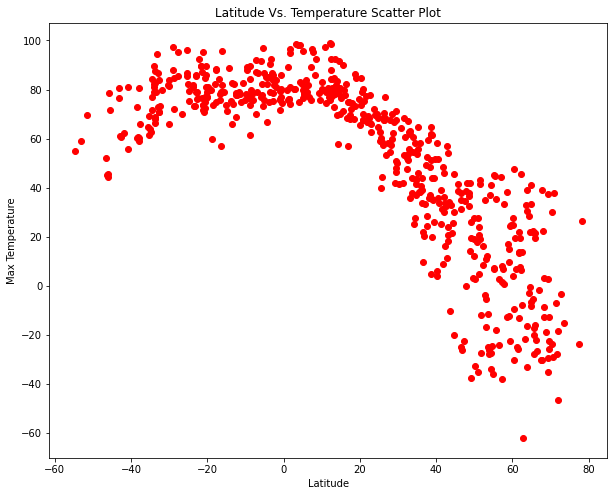

In [46]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Max Temp']
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs. Temperature Scatter Plot')
plt.savefig("latvtemp.png", bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

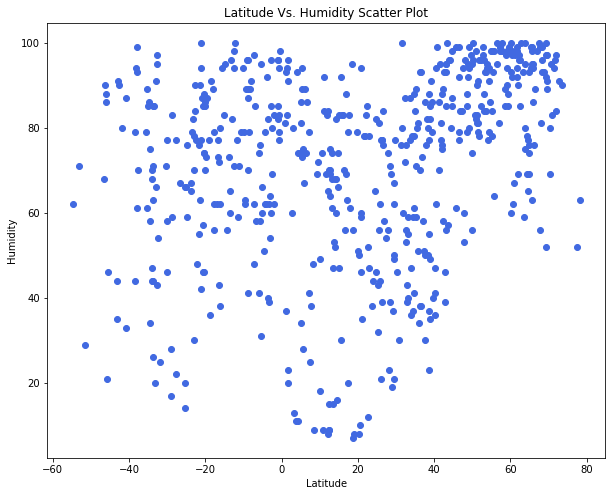

In [47]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Humidity']
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="royalblue")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity Scatter Plot')
plt.savefig("latvhumid.png", bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

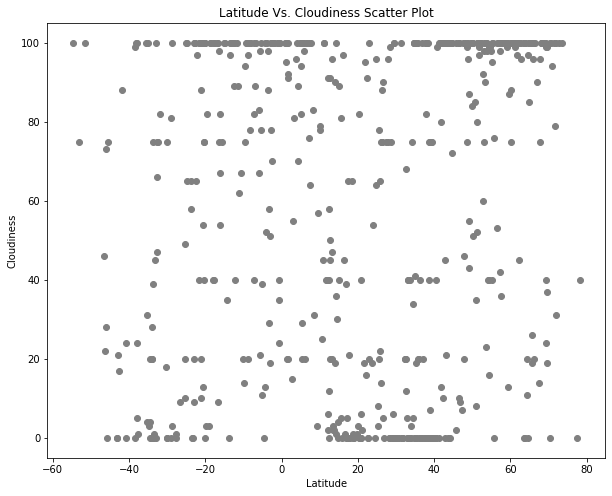

In [48]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Cloudiness']
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="gray")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness Scatter Plot')
plt.savefig("latvcloud.png", bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

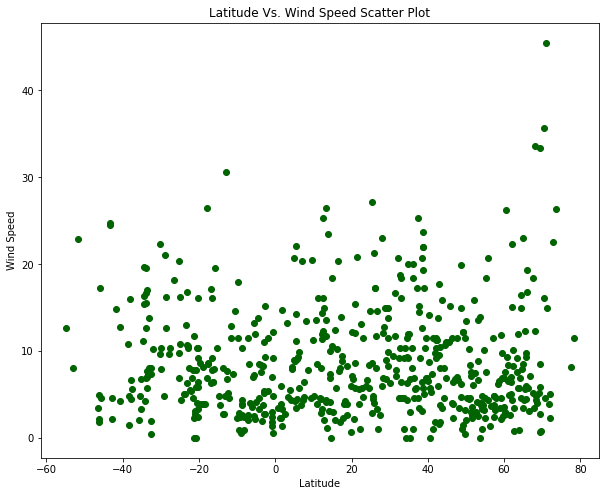

In [49]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Wind Speed']
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="darkgreen")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed Scatter Plot')
plt.savefig("latvwind.png", bbox_inches='tight')
plt.show()

## Linear Regression

In [15]:
north_hem= clean_city_data[clean_city_data['Lat'] > 0]
south_hem= clean_city_data[clean_city_data['Lat'] < 0]

In [16]:
north_hem.count()

Unnamed: 0             390
City                   390
Lat                    390
Lng                    390
Max Temp               390
Current Description    390
Humidity               390
Cloudiness             390
Wind Speed             390
Country                390
dtype: int64

In [17]:
south_hem.count()

Unnamed: 0             185
City                   185
Lat                    185
Lng                    185
Max Temp               185
Current Description    185
Humidity               185
Cloudiness             185
Wind Speed             185
Country                184
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
x_values= north_hem['Lat']
y_values= north_hem['Max Temp']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      16.877833
3      38.101723
5      12.979092
7       9.358690
8      57.975638
         ...    
567    -2.750153
568    38.256786
571    91.129738
573    89.794339
574    79.090829
Name: Lat, Length: 390, dtype: float64


In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.55x +97.83


The r-value is: 0.7398500134767768


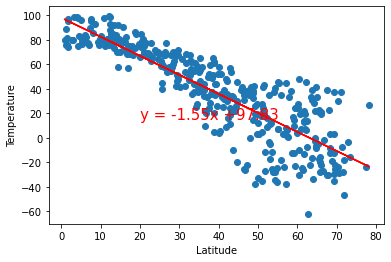

In [20]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
x_values= south_hem['Lat']
y_values= south_hem['Max Temp']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      81.478512
2      82.467769
4      76.715252
6      73.270429
9      80.964868
         ...    
564    76.583492
566    76.099008
569    77.569655
570    79.077245
572    78.827347
Name: Lat, Length: 185, dtype: float64


In [22]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.32x +84.09


The r-value is: 0.18745429723966078


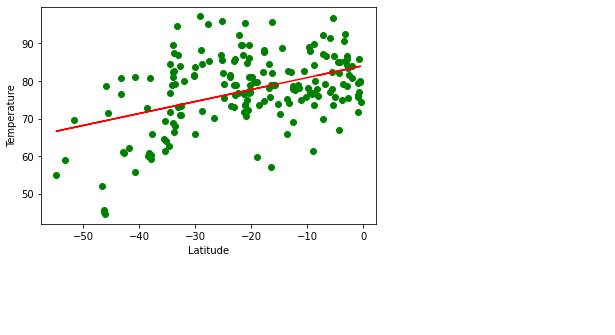

In [23]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
x_values= north_hem['Lat']
y_values= north_hem['Humidity']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      80.269764
3      72.283061
5      81.736888
7      83.099271
8      64.804364
         ...    
567    87.655916
568    72.224710
571    52.328238
573    52.830759
574    56.858566
Name: Lat, Length: 390, dtype: float64


In [25]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.58x +49.81


The r-value is: 0.24326194773314871


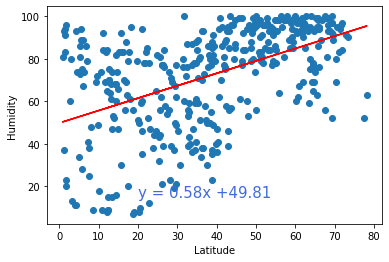

In [26]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="royalblue")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
x_values= south_hem['Lat']
y_values= south_hem['Humidity']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      73.404959
2      74.356570
4      68.822965
6      65.509234
9      72.910862
         ...    
564    68.696219
566    68.230172
569    69.644853
570    71.095073
572    70.854684
Name: Lat, Length: 185, dtype: float64


In [28]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.31x +75.92


The r-value is: 0.03988974242967767


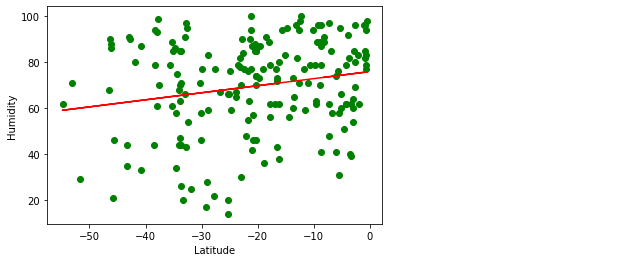

In [29]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="royalblue")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
x_values= north_hem['Lat']
y_values= north_hem['Cloudiness']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      65.630533
3      58.239744
5      66.988190
7      68.248922
8      51.319056
         ...    
567    72.465581
568    58.185747
571    39.773814
573    40.238839
574    43.966119
Name: Lat, Length: 390, dtype: float64


In [31]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.54x +37.44


The r-value is: 0.06942674899407507


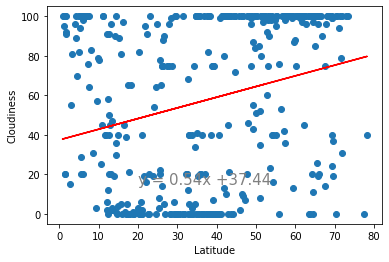

In [32]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="gray")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [33]:
x_values= south_hem['Lat']
y_values= south_hem['Cloudiness']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      72.421986
2      75.581420
4      57.209365
6      46.207489
9      70.781542
         ...    
564    56.788555
566    55.241240
569    59.938106
570    64.752961
572    63.954850
Name: Lat, Length: 185, dtype: float64


In [34]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.02x +80.77


The r-value is: 0.12106623523236876


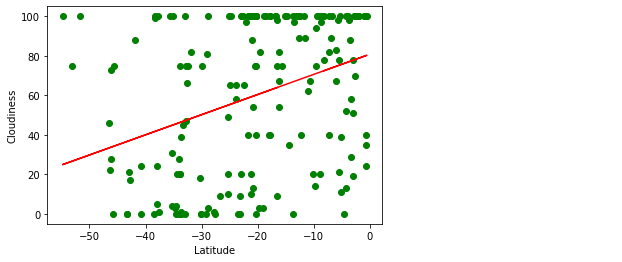

In [35]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="gray")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
x_values= north_hem['Lat']
y_values= north_hem['Wind Speed']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      8.871449
3      8.826164
5      8.879768
7      8.887493
8      8.783759
         ...   
567    8.913329
568    8.825833
571    8.713018
573    8.715868
574    8.738706
Name: Lat, Length: 390, dtype: float64


In [37]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.0x +8.7


The r-value is: 0.00010588832710867031


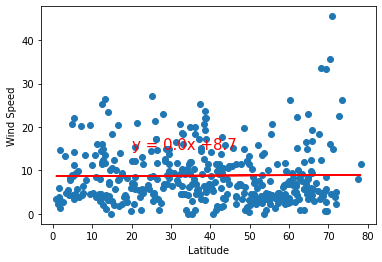

In [38]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [39]:
x_values= south_hem['Lat']
y_values= south_hem['Wind Speed']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      6.965390
2      6.638759
4      8.538115
6      9.675521
9      7.134984
         ...   
564    8.581620
566    8.741586
569    8.256010
570    7.758236
572    7.840747
Name: Lat, Length: 185, dtype: float64


In [40]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.11x +6.1


The r-value is: 0.059571498843296


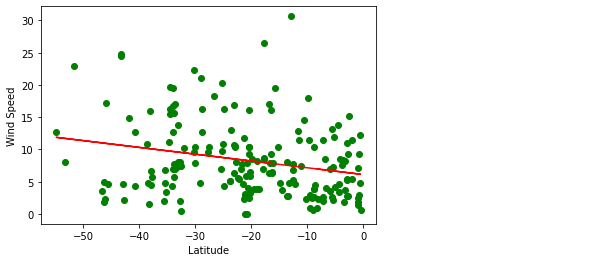

In [41]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()